# ****Micro-proyecto 3 - Árboles de decisión y clasificación bayesiana****


**OBJETIVO** :  ***Predecir enfermedad renal crónica***

##1. Carga de librerias y archivo csv

In [ ]:
## Carga de librerias
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedKFold

## librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

## librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer



In [ ]:
# Cargamos el archivo csv
from google.colab import files
import io
uploaded = files.upload()


Saving EnfermedadRenal.csv to EnfermedadRenal.csv


##2. Pre-procesamiento de los datos

Nuestro objetivo es predecir si una persona puede sufrir de una enfermedad renal crónica, para esto nos contamos de una base de datos con las siguientes características

De acuerdo la descripción proporcionada de los datos, la interpretación de cada variable es la siguiente:

1. Edad (numérico) edad en años
2.presión de sangre (numérica) pb en mm / Hg
3. *Gravedad específica (sg)* (nominal):
   - 1.005 = 0
   - 1.010 = 1
   - 1.015 = 2
   - 1.020 = 3
   - 1.025 = 4
4. *Albúmina (al)* (nominal):
   - 0 = 0
   - 1 = 1
   - 2 = 2
   - 3 = 3
   - 4 = 4
   - 5 = 5
5. *Azúcar (su)* (nominal):
   - 0 = 0
   - 1 = 1
   - 2 = 2
   - 3 = 3
   - 4 = 4
   - 5 = 5

6. *Glóbulos rojos (rbc)* (nominal):
   - Normal = 0
   - Anormal = 1
7. *Pus Cell (pc)* (nominal):
   - Normal = 0
   - Anormal = 1
8. *Grupos de células Pus (pcc)* (nominal):
   - No presente = 0
   - Presente = 1
9. *Bacterias (ba)* (nominal):
   - No presente = 0
   - Presente = 1
10. Glucosa en sangre al azar (numérico) bgr en mg / dl
11.Urea de sangre (numérica) bu en mgs / dl
12 Creatinina sérica (numérica) sc en mgs / dl
13 sodio (numérico) césped en meq / l
14.Potasio (numérico) maceta en meq / l
15.Hemoglobina (numérica) hemo en gms
16.Volumen de celda empaquetada (numérico)
17.Recuento de glóbulos blancos (numérico) WC en celdas / cumm
18.Recuento de células sanguíneas rojas (numérico) rc en millones / cmm
19. *Hipertensión (htn)* (nominal):
    - No = 0
    - Sí = 1
20. *Diabetes mellitus (dm)* (nominal):
    - No = 0
    - Sí = 1
21. *Enfermedad de la arteria coronaria (cad)* (nominal):
    - No = 0
    - Sí = 1
22. *Apetito (ape)* (nominal):
    - Bueno = 0
    - Pobre = 1
23. *Edema de pedal (pe)* (nominal):
    - No = 0
    - Sí = 1
24. *Anemia (ane)* (nominal):
    - No = 0
    - Sí = 1
25. *Clase (Variable respuesta)* (nominal):
    - Sin enfermedad renal crónica (notckd) = 0
    - Con enfermedad renal crónica (ckd) = 1

Observemos la base de datos

In [ ]:
cronica_df = pd.read_csv(io.BytesIO(uploaded['EnfermedadRenal.csv']))
cronica_df2 = pd.read_csv(io.BytesIO(uploaded['EnfermedadRenal.csv']))

cronica_df2

,edad,presión arterial,gravedad específica,albúmina,azúcar,glóbulos rojos,celda de pus,grupos de células de pus,bacterias,glucosa en sangre al azar,...,recuento de glóbulos blancos,recuento de glóbulos rojos,hipertensión,diabetes mellitus,enfermedad de la arteria coronaria,apetito,edema de pedal,anemia,clase RESPUESTA,Unnamed: 25
0,48,80,1020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7,50,1020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,NaN
2,62,80,1010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,NaN
3,48,70,1005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51,80,1010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1020,0,0,normal,normal,notpresent,notpresent,140,...,6700,4.9,no,no,no,good,no,no,notckd,NaN
396,42,70,1025,0,0,normal,normal,notpresent,notpresent,75,...,7800,6.2,no,no,no,good,no,no,notckd,NaN
397,12,80,1020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,NaN
398,17,60,1025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,NaN


In [ ]:
cronica_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   edad                                400 non-null    object
 1   presión arterial                    400 non-null    object
 2   gravedad específica                 400 non-null    object
 3   albúmina                            400 non-null    object
 4   azúcar                              400 non-null    object
 5   glóbulos rojos                      400 non-null    object
 6   celda de pus                        400 non-null    object
 7   grupos de células de pus            400 non-null    object
 8   bacterias                           400 non-null    object
 9   glucosa en sangre al azar           400 non-null    object
 10  urea en sangre                      400 non-null    object
 11  creatinina sérica                   400 non-null    object

Se remueve columna extra

In [ ]:
cronica_df2.columns

Index(['edad', 'presión arterial', 'gravedad específica', 'albúmina', 'azúcar',
       'glóbulos rojos', 'celda de pus', 'grupos de células de pus',
       'bacterias', 'glucosa en sangre al azar', 'urea en sangre',
       'creatinina sérica', 'sodio', 'potasio', 'hemoglobina',
       'volumen celular empaquetado', 'recuento de glóbulos blancos',
       'recuento de glóbulos rojos', 'hipertensión', 'diabetes mellitus',
       'enfermedad de la arteria coronaria', 'apetito', 'edema de pedal',
       'anemia', 'clase RESPUESTA', 'Unnamed: 25'],
      dtype='object')

In [ ]:
cronica_df2 = cronica_df2.drop(['Unnamed: 25'], axis=1)

Visualicemos cada variable

In [ ]:
anemia = sorted(list(cronica_df2['anemia'].unique()))
anemia

['?', 'no', 'yes']

Haciendo un análisis exploratorio de cada variable encontramos que hay algunos datos que están por fuera de la información dada en el diccionario del dataset

In [ ]:
# Agrupamos por la variable 'Anemia' y contamos los registros de cada categoría
print(cronica_df2.groupby('anemia').size())

# Asumimos que los valores incorrectos o atípicos podrían ser considerados como NaN
# Nota: Ajusta el criterio de selección para NaN si se conocen los valores incorrectos específicos
cronica_df2['anemia'][((cronica_df2['anemia']) == '?') ] = np.NaN

# Rellenamos los valores NaN con la moda de la variable 'anemia'
cronica_df2['anemia'].fillna(cronica_df2['anemia'].mode()[0], inplace=True)

print("Así nos queda la variable")
print(cronica_df2.groupby('anemia').size())

anemia
?        1
no     339
yes     60
dtype: int64
Así nos queda la variable
anemia
no     340
yes     60
dtype: int64


Estos datos los decidimos remplazar por la moda para no afectar al resto porque eliminarlos reduciría la cantidad de información que tenemos disponible

In [ ]:
# Convertimos la columna 'edad' a formato numérico
cronica_df2['edad'] = pd.to_numeric(cronica_df2['edad'], errors='coerce')

# Obtenemos los valores únicos de la columna 'edad' después de la conversión y los ordenamos
Edad = sorted(list(cronica_df2['edad'].unique()))
print(Edad)

# Reemplazamos los valores NaN con la media de la columna 'edad'
cronica_df2['edad'].fillna(cronica_df2['edad'].mean(), inplace=True)

print("Valores únicos de 'edad' después de llenar NaN:")
print(cronica_df2['edad'].unique())


[5.0, 7.0, 11.0, 15.0, 21.0, 24.0, 26.0, 35.0, 40.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 75.0, nan, 2.0, 3.0, 4.0, 6.0, 8.0, 12.0, 14.0, 17.0, 19.0, 20.0, 22.0, 23.0, 25.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 36.0, 37.0, 38.0, 39.0, 41.0, 43.0, 49.0, 57.0, 58.0, 66.0, 71.0, 74.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0]
Valores únicos de 'edad' después de llenar NaN:
[48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.  

Grupos por edad:

In [ ]:
print(cronica_df2.groupby('edad').size())

edad
2.0     1
3.0     1
4.0     1
5.0     2
6.0     1
       ..
80.0    4
81.0    1
82.0    1
83.0    1
90.0    1
Length: 77, dtype: int64


Realizamos un pre-procesamiento a la columna presion arterial dandole un formato numerico y reemplazando los valores NaN con la media para evitar perder informacion

In [ ]:
# Convertimos la columna 'presión arterial' a formato numérico
cronica_df2['presión arterial'] = pd.to_numeric(cronica_df2['presión arterial'], errors='coerce')

# Obtenemos los valores únicos de la columna 'presión arterial' después de la conversión y los ordenamos
presión_arterial = sorted(list(cronica_df2['presión arterial'].unique()))
print(presión_arterial)

# Reemplazamos los valores NaN con la media de la columna 'presión arterial'
cronica_df2['presión arterial'].fillna(cronica_df2['presión arterial'].mean(), inplace=True)

print("Valores únicos de 'presión arterial' después de llenar NaN:")
print(cronica_df2['presión arterial'].unique())

[50.0, 60.0, 70.0, 80.0, 90.0, nan, 100.0, 110.0, 120.0, 140.0, 180.0]
Valores únicos de 'presión arterial' después de llenar NaN:
[ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.
 120.        ]


In [ ]:
print(cronica_df2.groupby('presión arterial').size())

presión arterial
50.000000       5
60.000000      71
70.000000     112
76.469072      12
80.000000     116
90.000000      53
100.000000     25
110.000000      3
120.000000      1
140.000000      1
180.000000      1
dtype: int64


Realizamos un pre-procesamiento a la columna apetito, remplazando los valores desconocidos o vacios ('?' y ' ') por NaN y luego remplazando estos por la media para no perder informacion

In [ ]:
# Mostramos las categorías únicas en la columna 'apetito'
apetito = sorted(list(cronica_df2['apetito'].unique()))
print("Categorías únicas antes de la limpieza:", apetito)

# Reemplazamos los valores incorrectos o desconocidos por NaN
cronica_df2['apetito'].replace(['?', 'no'], np.NaN, inplace=True)

# Rellenamos los NaN con la moda de la columna 'apetito'
cronica_df2['apetito'].fillna(cronica_df2['apetito'].mode()[0], inplace=True)

# Mostramos las categorías únicas después de la limpieza
apetito = sorted(list(cronica_df2['apetito'].unique()))
print("Categorías únicas después de la limpieza:", apetito)


Categorías únicas antes de la limpieza: ['?', 'good', 'no', 'poor']
Categorías únicas después de la limpieza: ['good', 'poor']


In [ ]:
hipertension = sorted(list(cronica_df2['hipertensión'].unique()))
hipertension

['?', 'no', 'yes']

Remplazamos los valores desconocidos por la media para evitar perder informacion

In [ ]:
print(cronica_df2.groupby('hipertensión').size())
cronica_df2['hipertensión'].replace(['?'], np.NaN, inplace=True)

cronica_df2['hipertensión'][(cronica_df2['hipertensión'])==48]=np.NaN #Reemplazamos estos valores por NaN
cronica_df2['hipertensión'].fillna(cronica_df2['hipertensión'].mode()[0], inplace =True) # Posteriormente convertimos los NaN por la moda de los datos

print("Despues de reemplazar por la moda")
print(cronica_df2.groupby('hipertensión').size())


hipertensión
?        2
no     251
yes    147
dtype: int64
Despues de reemplazar por la moda
hipertensión
no     253
yes    147
dtype: int64


In [ ]:
hemoglobina = sorted(list(cronica_df2['hemoglobina'].unique()))
hemoglobina

['10.0',
 '10.1',
 '10.2',
 '10.3',
 '10.4',
 '10.5',
 '10.6',
 '10.7',
 '10.8',
 '10.9',
 '11.0',
 '11.1',
 '11.2',
 '11.3',
 '11.4',
 '11.5',
 '11.6',
 '11.7',
 '11.8',
 '11.9',
 '12',
 '12.0',
 '12.1',
 '12.2',
 '12.3',
 '12.4',
 '12.5',
 '12.6',
 '12.7',
 '12.8',
 '12.9',
 '13',
 '13.0',
 '13.1',
 '13.2',
 '13.3',
 '13.4',
 '13.5',
 '13.6',
 '13.7',
 '13.8',
 '13.9',
 '14.0',
 '14.1',
 '14.2',
 '14.3',
 '14.4',
 '14.5',
 '14.6',
 '14.7',
 '14.8',
 '14.9',
 '15',
 '15.0',
 '15.1',
 '15.2',
 '15.3',
 '15.4',
 '15.5',
 '15.6',
 '15.7',
 '15.8',
 '15.9',
 '16.0',
 '16.1',
 '16.2',
 '16.3',
 '16.4',
 '16.5',
 '16.6',
 '16.7',
 '16.8',
 '16.9',
 '17.0',
 '17.1',
 '17.2',
 '17.3',
 '17.4',
 '17.5',
 '17.6',
 '17.7',
 '17.8',
 '3.1',
 '4.8',
 '5.5',
 '5.6',
 '5.8',
 '6.0',
 '6.1',
 '6.2',
 '6.3',
 '6.6',
 '6.8',
 '7.1',
 '7.3',
 '7.5',
 '7.6',
 '7.7',
 '7.9',
 '8.0',
 '8.1',
 '8.2',
 '8.3',
 '8.4',
 '8.5',
 '8.6',
 '8.7',
 '8.8',
 '9.0',
 '9.1',
 '9.2',
 '9.3',
 '9.4',
 '9.5',
 '9.6',
 '9.

Remplazaremos de nuevo los datos atipicos en la columna hemoglobina por la moda porque eliminarlos nos quitaria información

In [ ]:
print(cronica_df2.groupby('hemoglobina').size())

# Convertimos la columna 'hemoglobina' a formato numérico
cronica_df2['hemoglobina'] = pd.to_numeric(cronica_df2['hemoglobina'], errors='coerce')

cronica_df2['hemoglobina'].replace(['?'], np.NaN, inplace=True)
cronica_df2['hemoglobina'][(cronica_df2['hemoglobina'])==76]=np.NaN # Reemplazamos estos valores con NaN
cronica_df2['hemoglobina'].fillna(cronica_df2['hemoglobina'].mean(), inplace =True) # Posteriormente sustituimos los NaN por la moda de la variable

print("\n Despues de reemplazar por NaN \n",)
print(cronica_df2.groupby('hemoglobina').size())

hemoglobina
10.0     5
10.1     3
10.2     2
10.3     6
10.4     3
        ..
9.6      3
9.7      5
9.8      7
9.9      3
?       52
Length: 119, dtype: int64

 Despues de reemplazar por NaN 

hemoglobina
3.1     1
4.8     1
5.5     1
5.6     1
5.8     1
       ..
17.4    2
17.5    1
17.6    1
17.7    1
17.8    3
Length: 116, dtype: int64


<ipython-input-20-bfab4e5b03fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cronica_df2['hemoglobina'][(cronica_df2['hemoglobina'])==76]=np.NaN # Reemplazamos estos valores con NaN


In [ ]:
clase_respuesta = list(cronica_df2['clase RESPUESTA'].unique())
clase_respuesta

['ckd', 'no', 'ckd\t', 'notckd']

En la columna clase RESPUESTA movimos todos los datos en 2 clases, a ckd trasladamos a los que estaban en ckd/t y dejamos a los que ya estaban en ckd, a notckd trasladamos a los que estaban en no y dejamos a los que ya estaban en notckd

In [ ]:
cronica_df2['clase RESPUESTA'] = cronica_df2['clase RESPUESTA'].str.strip().replace({
    'ckd': 'ckd',
    'ckd\t': 'ckd',
    'no': 'notckd',
    'notckd': 'notckd'
})


Convirtamos los valores "?" por NAN

In [ ]:
# Reemplazar '?' y valores vacíos por NaN
cronica_df2.replace('?', pd.NA, inplace=True)
cronica_df2.replace('', pd.NA, inplace=True)

In [ ]:
cronica_df2

,edad,presión arterial,gravedad específica,albúmina,azúcar,glóbulos rojos,celda de pus,grupos de células de pus,bacterias,glucosa en sangre al azar,...,volumen celular empaquetado,recuento de glóbulos blancos,recuento de glóbulos rojos,hipertensión,diabetes mellitus,enfermedad de la arteria coronaria,apetito,edema de pedal,anemia,clase RESPUESTA
0,48.0,80.0,1020,1,0,<NA>,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1020,4,0,<NA>,normal,notpresent,notpresent,<NA>,...,38,6000,<NA>,no,no,no,good,no,no,ckd
2,62.0,80.0,1010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,<NA>,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


Se convirtieron todas las columnas categoricas a numericas y verificamos que las que ya eran numericas si tengan el formato adecuado

In [ ]:
# Lista de columnas categóricas
categorical_columns = [
    'gravedad específica',
    'albúmina',
    'azúcar',
    'glóbulos rojos',
    'celda de pus',
    'grupos de células de pus',
    'bacterias',
    'hipertensión',
    'diabetes mellitus',
    'enfermedad de la arteria coronaria',
    'apetito',
    'edema de pedal',
    'anemia',
    'clase RESPUESTA'
]

# Lista de columnas numéricas (verificar si ya están en formato numérico)
numeric_columns = [
    'edad',
    'presión arterial',
    'glucosa en sangre al azar',
    'urea en sangre',
    'creatinina sérica',
    'sodio',
    'potasio',
    'hemoglobina',
    'volumen celular empaquetado',
    'recuento de glóbulos blancos',
    'recuento de glóbulos rojos'
]

# Convertir variables categóricas a números usando Label Encoding
for column in categorical_columns:

    mode_value = cronica_df2[column].mode().iloc[0]
    cronica_df2[column].fillna(mode_value, inplace=True)

    cronica_df2[column] = cronica_df2[column].astype('category').cat.codes


# Verificar si las columnas numéricas están en formato numérico
for column in numeric_columns:
    cronica_df2[column] = pd.to_numeric(cronica_df2[column], errors='coerce')

    # Reemplazar NaN con la media en las columnas numéricas
    mean_value = cronica_df2[column].mean()
    cronica_df2[column].fillna(mean_value, inplace=True)

# Verificar el resultado de las conversiones
print(cronica_df2.head())

   edad  presión arterial  gravedad específica  albúmina  azúcar  \
0  48.0              80.0                    3         1       0   
1   7.0              50.0                    3         4       0   
2  62.0              80.0                    1         2       3   
3  48.0              70.0                    0         4       0   
4  51.0              80.0                    1         2       0   

   glóbulos rojos  celda de pus  grupos de células de pus  bacterias  \
0               1             1                         0          0   
1               1             1                         0          0   
2               1             1                         0          0   
3               1             0                         1          0   
4               1             1                         0          0   

   glucosa en sangre al azar  ...  volumen celular empaquetado  \
0                 121.000000  ...                         44.0   
1                 148.0365

In [ ]:
cronica_df2

,edad,presión arterial,gravedad específica,albúmina,azúcar,glóbulos rojos,celda de pus,grupos de células de pus,bacterias,glucosa en sangre al azar,...,volumen celular empaquetado,recuento de glóbulos blancos,recuento de glóbulos rojos,hipertensión,diabetes mellitus,enfermedad de la arteria coronaria,apetito,edema de pedal,anemia,clase RESPUESTA
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,3,1,0,1,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,2,1,0,1,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,3,1,1,1,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,2,1,1,2,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,2,1,0,1,0,1
396,42.0,70.0,4,0,0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,2,1,0,1,0,1
397,12.0,80.0,3,0,0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,2,1,0,1,0,1
398,17.0,60.0,4,0,0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,2,1,0,1,0,1


Rellenamos los valores con NaN con el valor siguiente en la columna

In [ ]:
cronica_df2= cronica_df2.fillna(method="backfill") #rellenamos Los Valores NaN con el valor siguiente en la columna ya que no están consecutivos
print(cronica_df2.groupby('anemia').size())
print(cronica_df2.groupby('apetito').size())
print(cronica_df2.groupby('hipertensión').size())
print(cronica_df2.groupby('hemoglobina').size())


anemia
0    340
1     60
dtype: int64
apetito
0    318
1     82
dtype: int64
hipertensión
0    253
1    147
dtype: int64
hemoglobina
3.1     1
4.8     1
5.5     1
5.6     1
5.8     1
       ..
17.4    2
17.5    1
17.6    1
17.7    1
17.8    3
Length: 116, dtype: int64


<ipython-input-27-7308b163ed66>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cronica_df2= cronica_df2.fillna(method="backfill") #rellenamos Los Valores NaN con el valor siguiente en la columna ya que no están consecutivos


In [ ]:
cronica_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   edad                                400 non-null    float64
 1   presión arterial                    400 non-null    float64
 2   gravedad específica                 400 non-null    int8   
 3   albúmina                            400 non-null    int8   
 4   azúcar                              400 non-null    int8   
 5   glóbulos rojos                      400 non-null    int8   
 6   celda de pus                        400 non-null    int8   
 7   grupos de células de pus            400 non-null    int8   
 8   bacterias                           400 non-null    int8   
 9   glucosa en sangre al azar           400 non-null    float64
 10  urea en sangre                      400 non-null    float64
 11  creatinina sérica                   400 non-n

##3. Variable objetivo

Usando Seaborn creamos un gráfico de conteo en la columna clase RESPUESTA

<ipython-input-29-eb65017fa1cd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')


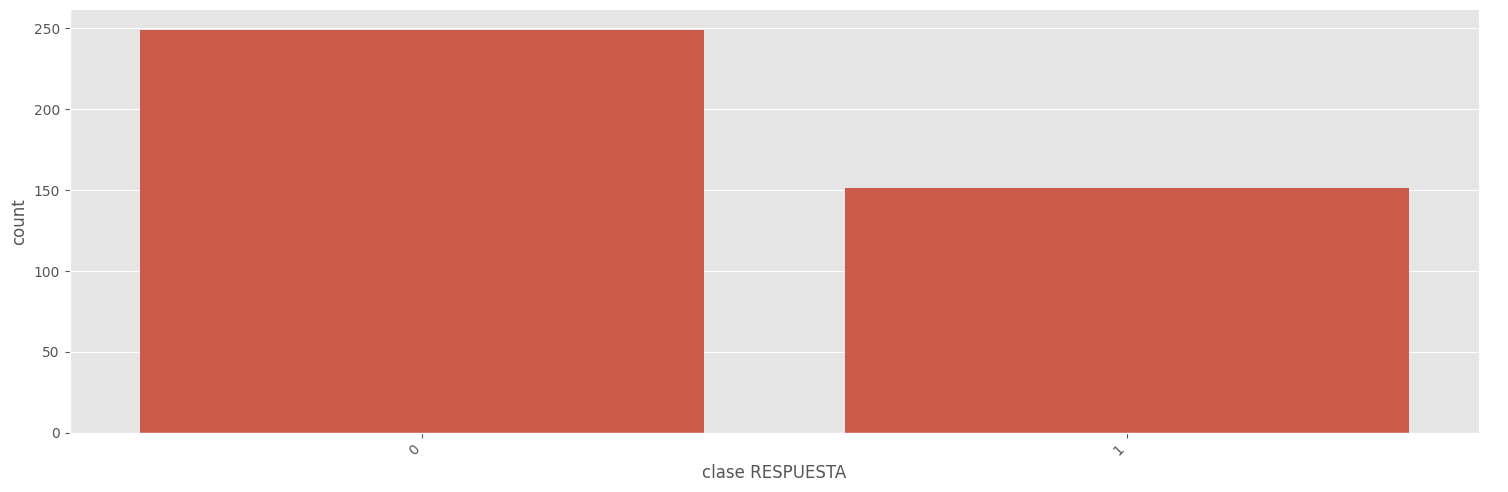

In [ ]:
g = sb.catplot(x='clase RESPUESTA', data=cronica_df2, kind="count", aspect=3)
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

Podemos ver una predominancia de la respuesta 0

##4. Correlación de variables

Analizamos las variables para ver si a alguna relación entre ellas, ya que son categóricas los gráficos no son muy dispersos, pero no parece a ver ninguna relación muy marcada

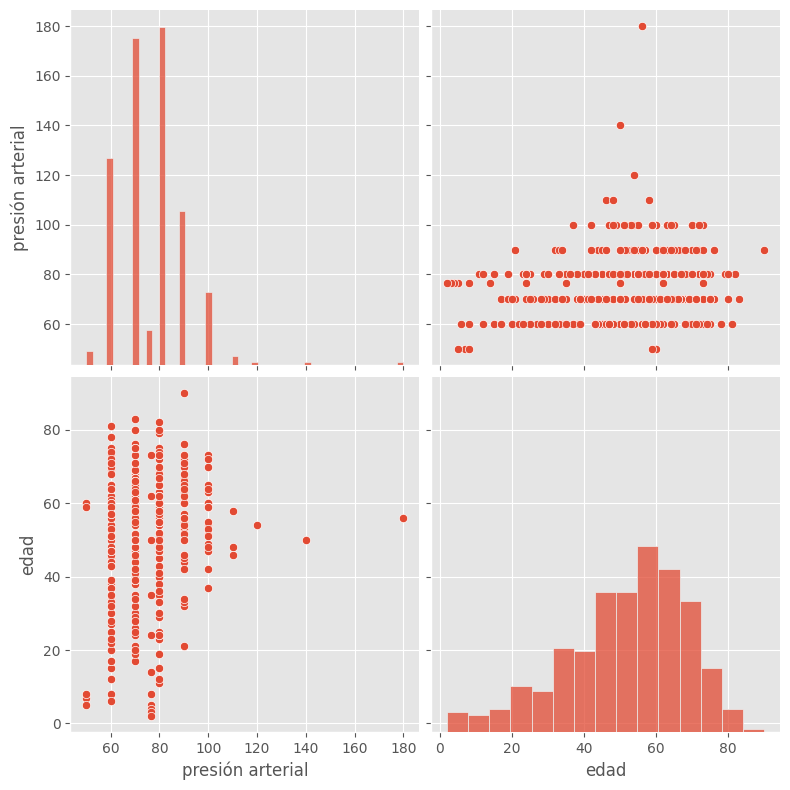

In [ ]:
#Visualizar relación si existe relación entre las variables que no son la variable objetivo
sb.pairplot(cronica_df2,
            height=4,
            vars=['presión arterial','edad'],
            kind='scatter')
plt.show()

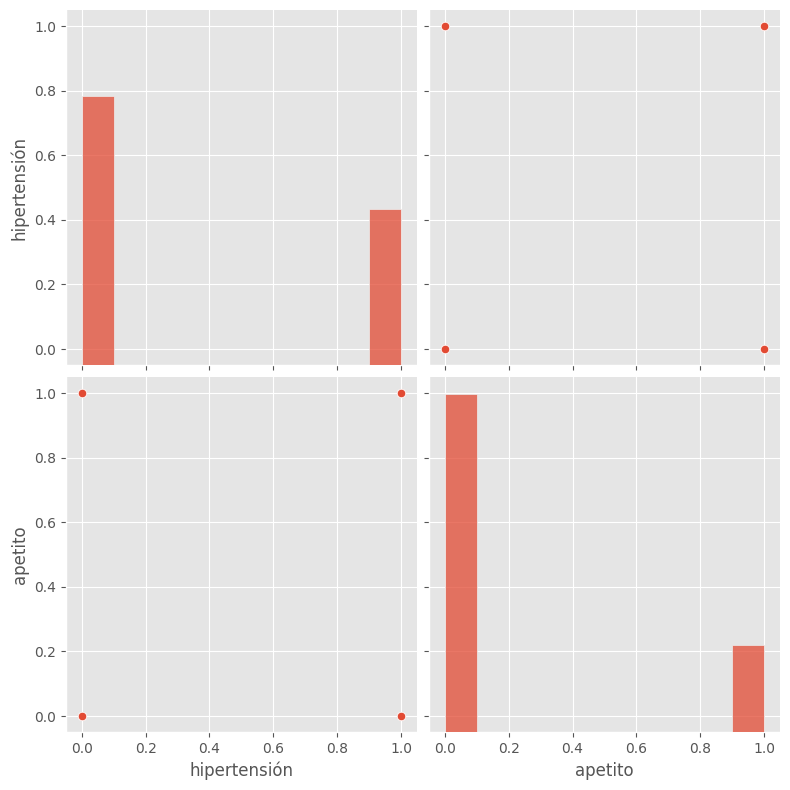

In [ ]:
sb.pairplot(cronica_df2,
            height=4,
            vars=['hipertensión','apetito'],
            kind='scatter')
plt.show()

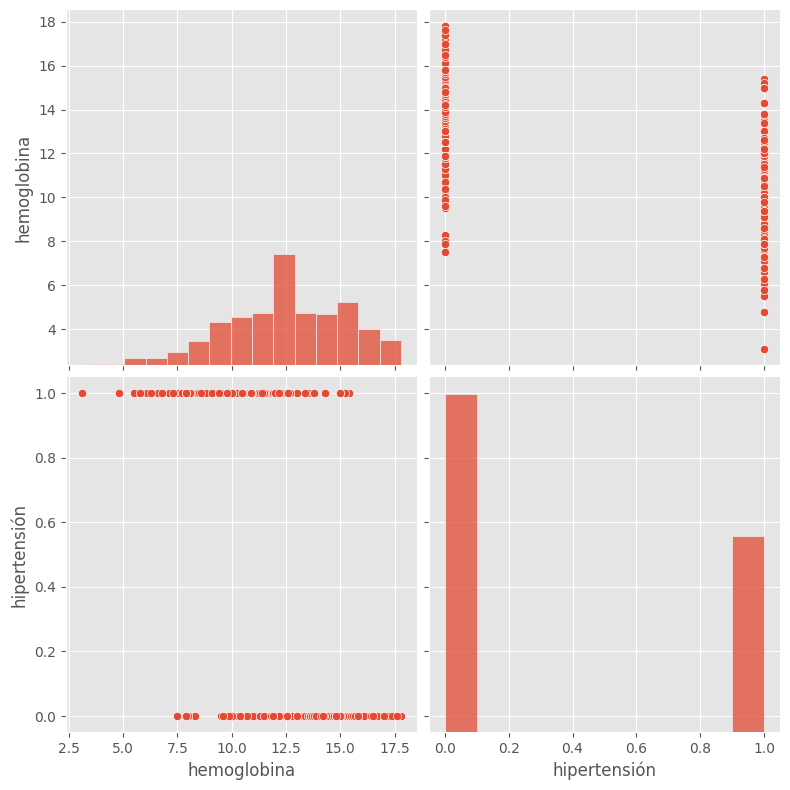

In [ ]:
sb.pairplot(cronica_df2,
            height=4,
            vars=['hemoglobina','hipertensión'],
            kind='scatter')
plt.show()

Text(0.5, 0.98, 'anemia vs clase RESPUESTA')

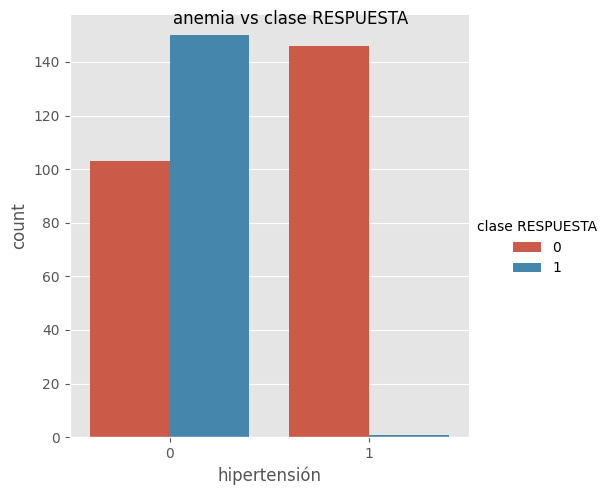

In [ ]:
g = sb.catplot(x='hipertensión', data=cronica_df2, hue='clase RESPUESTA', kind="count")

g.fig.suptitle("anemia vs clase RESPUESTA")

Text(0.5, 0.98, 'anemia vs apetito')

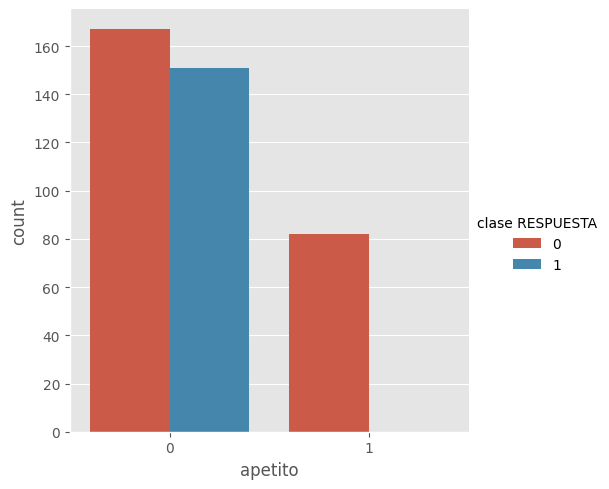

In [ ]:
dg = sb.catplot(x='apetito', data=cronica_df2, hue='clase RESPUESTA', kind="count")

g.fig.suptitle("anemia vs apetito")

##5. Característica escogida para el nodo raíz. ¿Entropia o gini?

Mezclamos los datos

In [ ]:
#Característica objetivo: clase RESPUESTA
#Mezclar datos
dataframe=cronica_df2.sample(frac=1).reset_index(drop=True)

#Todos los datos excepto la caracteristica clase RESPUESTA
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = dataframe['clase RESPUESTA']

#¿Cuáles serían las características/atributos/variables que puede ser posibles candidatos al nodo raíz? Se debe analizar una hipótesis con el análisis exploratorio

X = np.array(X)
y = np.array(y)

Veamos ahora las métricas entropía y Gini para elegir cual es la más adecuada ara nuestro grupo de datos:

### Entropía

In [ ]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
accuracies_entro = list()
max_attributes = len(list(dataframe))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced')
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies_entro.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies_entro})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.910033
         2          0.969998
         3          0.962423
         4          0.957448
         5          0.957448
         6          0.957448
         7          0.957448
         8          0.957448
         9          0.957448
        10          0.957448
        11          0.957448
        12          0.957448
        13          0.957448
        14          0.957448
        15          0.957448
        16          0.957448
        17          0.957448
        18          0.957448
        19          0.957448
        20          0.957448
        21          0.957448
        22          0.957448
        23          0.957448
        24          0.957448
        25          0.957448


### Gini

In [ ]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
accuracies_gini = list()
max_attributes = len(list(dataframe))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced')
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies_gini.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies_gini})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.915008
         2          0.975011
         3          0.972524
         4          0.969998
         5          0.972524
         6          0.972524
         7          0.972524
         8          0.969998
         9          0.972524
        10          0.969998
        11          0.972524
        12          0.972524
        13          0.972524
        14          0.972524
        15          0.969998
        16          0.969998
        17          0.969998
        18          0.972524
        19          0.969998
        20          0.969998
        21          0.972524
        22          0.972524
        23          0.972524
        24          0.969998
        25          0.969998


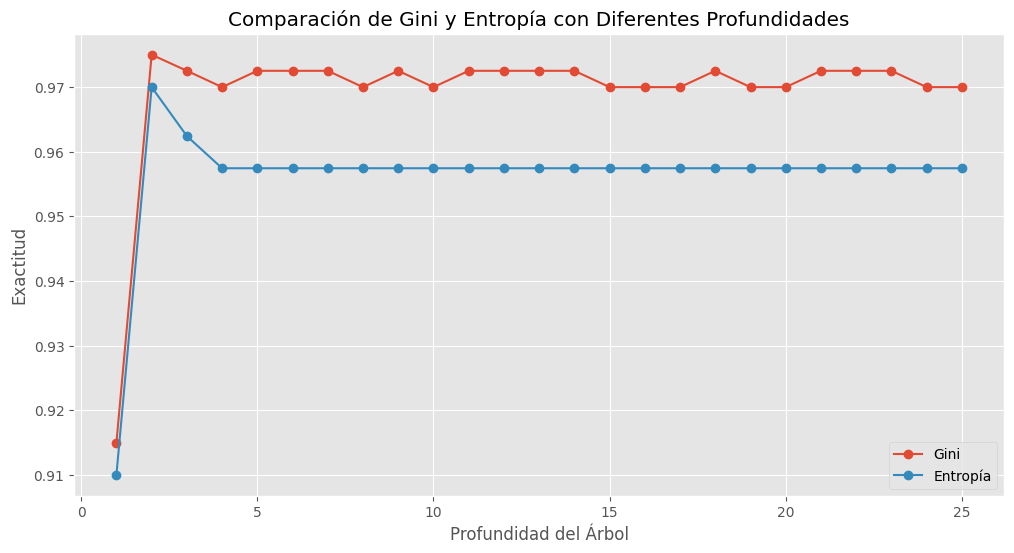

Mejor profundidad para Gini: 2 con exactitud: 0.9750113071008594
Mejor profundidad para Entropía: 2 con exactitud: 0.969998492386552


In [ ]:
# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(depth_range, accuracies_gini, label='Gini', marker='o')
plt.plot(depth_range, accuracies_entro, label='Entropía', marker='o')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Exactitud')
plt.title('Comparación de Gini y Entropía con Diferentes Profundidades')
plt.legend()
plt.grid(True)
plt.show()

#Imprimir resultados
print(f"Mejor profundidad para Gini: {depth_range[accuracies_gini.index(max(accuracies_gini))]} con exactitud: {max(accuracies_gini)}")
print(f"Mejor profundidad para Entropía: {depth_range[accuracies_entro.index(max(accuracies_entro))]} con exactitud: {max(accuracies_entro)}")

La más adecuada parece ser Gini, ya que la línea de Gini es más suave y estable, lo que sugiere que el árbol de decisión construido usando Gini generaliza mejor a diferentes profundidades sin sacrificar exactitud.

### PEARSON

<Axes: title={'center': 'Matriz de correlacion Pearson'}>

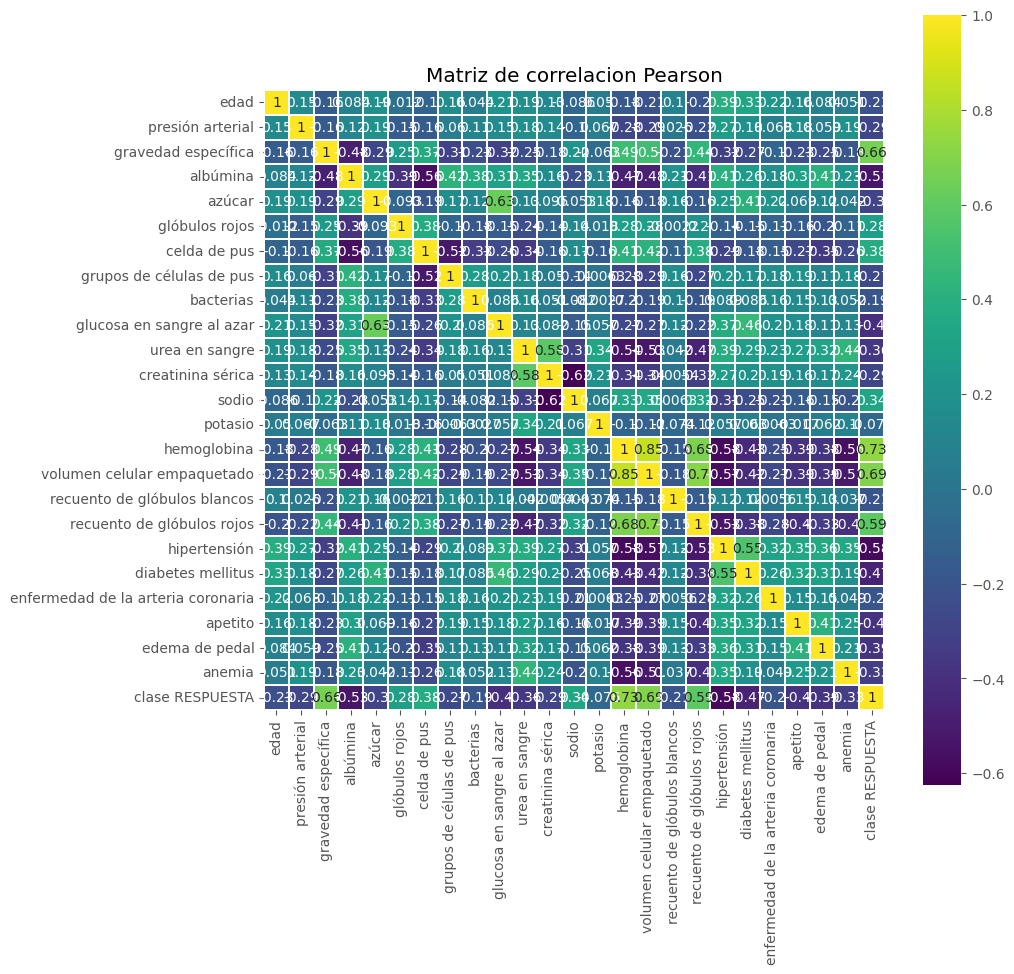

In [ ]:
#Haciendo la correlación de las variables con las variables significativas
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Matriz de correlacion Pearson')
sb.heatmap(cronica_df2.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

La variable "clase RESPUESTA" tiene correlaciones más significativas con la "creatinina sérica" y la "gravedad específica", lo que sugiere que estos factores podrían ser más relevantes para predecir la respuesta del paciente en este contexto.

### CRAMER V

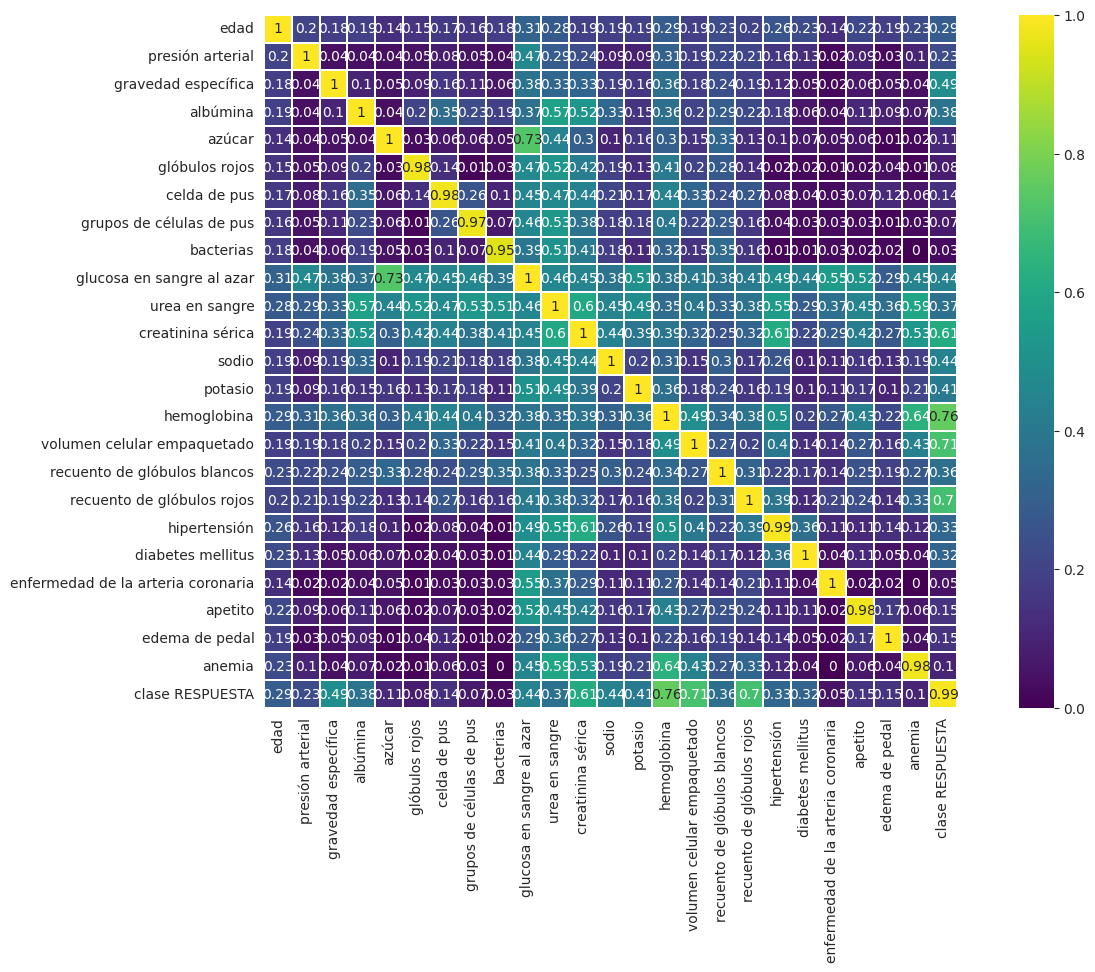

In [ ]:
data_encoded = cronica_df2.copy()
from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,2))
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
with sb.axes_style("white"):
  ax = sb.heatmap(df,
                  vmin=0.,
                  vmax=1,
                  cmap=colormap,
                  annot=True,
                  linewidths=0.1,
                  square=True)

plt.show()

Las correlaciones más relevantes con la variable "clase RESPUESTA" son "creatinina sérica" y "glucosa en sangre al azar", lo que refuerza la importancia de estas variables en la predicción o clasificación del resultado de interés.

##6. Datos de entrenamiento y prueba.

Para los datos del entrenamiento probamos con tres distintas formas 90/10, 80/20 y 70/30 (entrenamiento/prueba)

### 90% de entrenamiento / 10% de prueba

In [ ]:
#Todos los datos excepto la caracteristica clase RESPUESTA
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#Atributo OBJETIVO
y = dataframe['clase RESPUESTA']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1, #90% datos de entrenamiento, 10% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

,0
label,
0,224
1,136


In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced')

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.97
Exactitud con datos de pruebas: 1.00


### 80% de entrenamiento / 20% de prueba

In [ ]:
#Todos los datos excepto la caracteristica clase RESPUESTA
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#Atributo OBJETIVO
y = dataframe['clase RESPUESTA']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

,0
label,
0,199
1,121


In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced')

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.97
Exactitud con datos de pruebas: 0.97


### 70% de entrenamiento / 30% de prueba

In [ ]:
#Todos los datos excepto la caracteristica clase RESPUESTA
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#Atributo OBJETIVO
y = dataframe['clase RESPUESTA']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #70% datos de entrenamiento, 30% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

,0
label,
0,174
1,106


In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced')

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.97
Exactitud con datos de pruebas: 0.97


Y en general en 80/20 nos daba una menor diferencia entre la exactitud de los datos de entrenamiento y la exactitud de los datos de prueba

##7. SELECCION

Probamos primero con nuestro maximo de atributos para tener seguridad de que todas son tenidas en cuenta

Ahora bien en este Kbest buscaremos encontrar el mejor atributo

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = dataframe['clase RESPUESTA']

best=SelectKBest(k=len(list(dataframe))-1)    #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['edad', 'presión arterial', 'gravedad específica', 'albúmina', 'azúcar',
       'glóbulos rojos', 'celda de pus', 'grupos de células de pus',
       'bacterias', 'glucosa en sangre al azar', 'urea en sangre',
       'creatinina sérica', 'sodio', 'potasio', 'hemoglobina',
       'volumen celular empaquetado', 'recuento de glóbulos blancos',
       'recuento de glóbulos rojos', 'hipertensión', 'diabetes mellitus',
       'enfermedad de la arteria coronaria', 'apetito', 'edema de pedal',
       'anemia'],
      dtype='object')


#### n=3 atributos

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = dataframe['clase RESPUESTA']

best=SelectKBest(k=3)   #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['gravedad específica', 'hemoglobina', 'volumen celular empaquetado'], dtype='object')


#### n=2 atributos

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = dataframe['clase RESPUESTA']

best=SelectKBest(k=2)   #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['hemoglobina', 'volumen celular empaquetado'], dtype='object')


#### n=1 atributos

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = dataframe.drop(['clase RESPUESTA'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = dataframe['clase RESPUESTA']

best=SelectKBest(k=1)   #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['hemoglobina'], dtype='object')


Podemos concluir de estos resultados que las caracteristicas mas relevantes son hemoglobina, volumen celular empaquetado y gravedad específica (en ese orden)

##8. Alturas del árbol

Veamos el valor de accuracy para distintas profundidades del arbol

In [ ]:
X = cronica_df2.drop(['clase RESPUESTA'], axis=1)
y = cronica_df2['clase RESPUESTA']

In [ ]:
#Para usar este método X y 'y' deben ser listas np
X=np.array(X)
y=np.array(y)

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
accuracies = list()
max_attributes = len(list(dataframe))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced')
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

#¿Dónde se alcanza el mejor valor de exactitud?

 Max Depth  Average Accuracy
         1          0.912558
         2          0.972486
         3          0.967511
         4          0.967511
         5          0.967511
         6          0.967511
         7          0.967511
         8          0.967511
         9          0.967511
        10          0.967511
        11          0.967511
        12          0.967511
        13          0.967511
        14          0.967511
        15          0.967511
        16          0.967511
        17          0.967511
        18          0.967511
        19          0.967511
        20          0.967511
        21          0.967511
        22          0.967511
        23          0.967511
        24          0.967511
        25          0.967511


Viendo los resultados vemos que el mejor promedio se obtiene para la profundidad 2, nos vamos a quedar con esa profundidad para el trabajo

##9. Mínimo de muestras por nodo, mínimo de muestra por hoja

In [ ]:
X = cronica_df2.drop(['clase RESPUESTA'], axis=1)
y = cronica_df2['clase RESPUESTA']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #90% datos de entrenamiento, 10% prueba
                                                    stratify = y,
                                                    random_state = 1)

In [ ]:
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

,0
label,
0,174
1,106


Haciendo pruebas de exactitud encontramos que nos daban mejores resultados utilizando  muestas mínimas por nodo y 2 por hoja, la diferencia entre los resultados en el entrenamiento y la prueba no fueron mayores a 0.10 asi que no hubo necesidad de balancear las clases

### Decision de profundidades

De los resultados anteriores vimos que la profundidad  era la mejor opción, sin embargo probamos condiferentes profundidades

In [ ]:
# Instanciar Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                            #Restricciones que evitan Overfitting.
                                            min_samples_split=5, #5. Qué pasa si varió el número de muestras mínimo por nodo.
                                            min_samples_leaf=2,   #5. Qué pasa si vario el número de muestras mínimo por hoja (Las hojas es el nodo final del).
                                            max_depth = 4,    #4. Testear qué pasa si aumento o disminuyo la altura del arbol.
                                                              #Tener en cuenta que la altura va desde 1 hasta el número de atributos (Variables).
                                            class_weight='balanced')  #Balanceo automático
                                            #class_weight={0:1, 1:w})

In [ ]:
# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)

#Cada cambio que se haga requiere analizar o tener en cuenta su nivel de exactitud.

#Exactitud

#Datos de entrenamiento
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

#Datos de prueba
y_pred_test = decision_tree.predict(X_test)

#Porcentaje de exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.99
Exactitud con datos de pruebas: 0.96


In [ ]:
# Instanciar Arbol de decision con profundidad = 6
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                            #Restricciones que evitan Overfitting.
                                            min_samples_split=5, #5. Qué pasa si varió el número de muestras mínimo por nodo.
                                            min_samples_leaf=2,   #5. Qué pasa si vario el número de muestras mínimo por hoja (Las hojas es el nodo final del).
                                            max_depth = 6,    #4. Testear qué pasa si aumento o disminuyo la altura del arbol.
                                                              #Tener en cuenta que la altura va desde 1 hasta el número de atributos (Variables).
                                            class_weight='balanced')  #Balanceo automático
                                            #class_weight={0:1, 1:w})

In [ ]:
# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)

#Cada cambio que se haga requiere analizar o tener en cuenta su nivel de exactitud.

#Exactitud

#Datos de entrenamiento
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

#Datos de prueba
y_pred_test = decision_tree.predict(X_test)

#Porcentaje de exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.99
Exactitud con datos de pruebas: 0.96


In [ ]:
# Instanciar Arbol de decision con profundidad = 5
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                            #Restricciones que evitan Overfitting.
                                            min_samples_split=5, #5. Qué pasa si varió el número de muestras mínimo por nodo.
                                            min_samples_leaf=2,   #5. Qué pasa si vario el número de muestras mínimo por hoja (Las hojas es el nodo final del).
                                            max_depth = 5,    #4. Testear qué pasa si aumento o disminuyo la altura del arbol.
                                                              #Tener en cuenta que la altura va desde 1 hasta el número de atributos (Variables).
                                            class_weight='balanced')  #Balanceo automático
                                            #class_weight={0:1, 1:w})

In [ ]:
# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)

#Cada cambio que se haga requiere analizar o tener en cuenta su nivel de exactitud.

#Exactitud

#Datos de entrenamiento
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

#Datos de prueba
y_pred_test = decision_tree.predict(X_test)

#Porcentaje de exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.99
Exactitud con datos de pruebas: 0.96


El mejor resultado obtenido es con la profundidad 5, la diferencia entre los resultados en el entrenamiento y la prueba no fueron mayores a 0.10, asi que lo consideramos un buen resultado

DECIDIMOS UTILIZAR PROFUNDIDAD 5

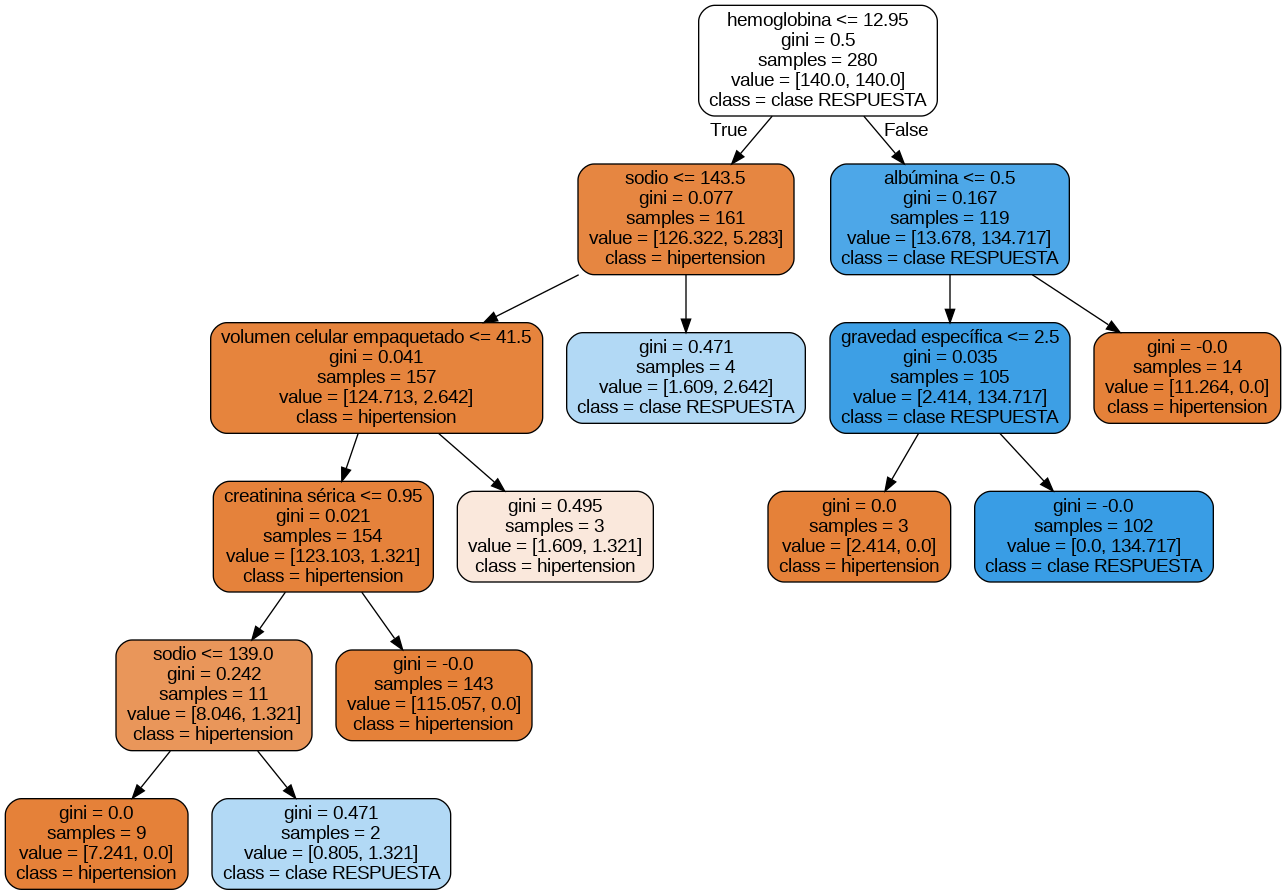

In [ ]:
# exportar el modelo a archivo .dot y graficar
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 8,
                              impurity = True,
                              feature_names = list(cronica_df2.drop(['clase RESPUESTA'], axis=1)),
                              class_names = ['hipertension', 'clase RESPUESTA'],
                              rounded = True,
                              filled= True )

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

##10. Matriz de confusión.

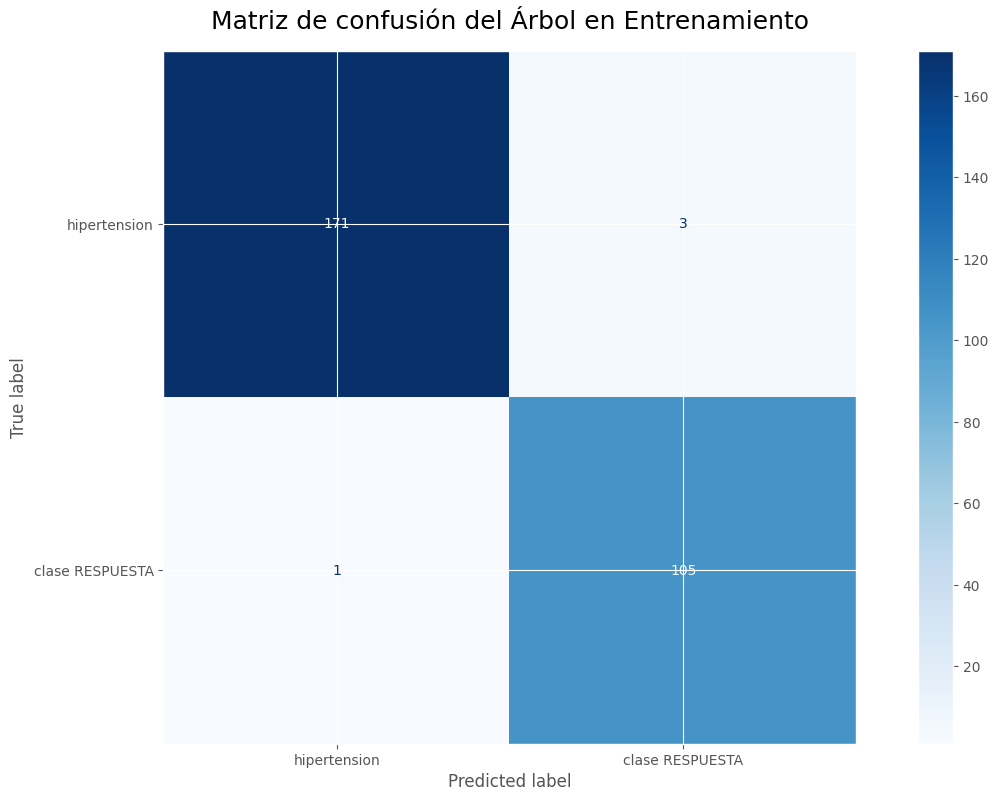

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculamos la matriz de confusión
cm = confusion_matrix(y_train, decision_tree.predict(X_train))

# Creamos un objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['hipertension', 'clase RESPUESTA'])

# Personalizamos el gráfico
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' para números enteros
disp.ax_.set_title('Matriz de confusión del Árbol en Entrenamiento', y=1.02, size=18)

plt.show()

El modelo parece tener un buen desempeño general, dado que la mayoría de las instancias fueron clasificadas correctamente. La precisión parece alta, ya que el número de clasificaciones correctas es considerablemente mayor que las incorrectas.

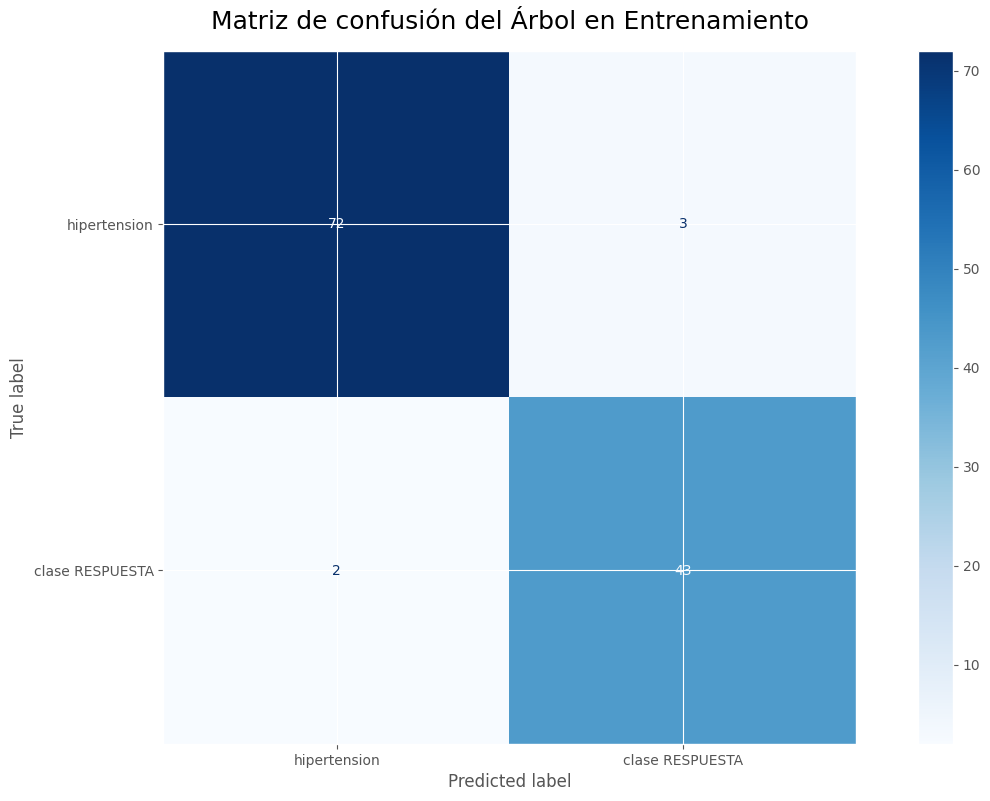

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, decision_tree.predict(X_test))

# Creamos un objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['hipertension', 'clase RESPUESTA'])

# Personalizamos el gráfico
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' para números enteros
disp.ax_.set_title('Matriz de confusión del Árbol en Entrenamiento', y=1.02, size=18)

plt.show()

Vemos que hubieron muy pocas asignaciones erroneas en comparacion a las correctas, el modelo es correcto

##11. Métrica de exactitud

### Entrenamiento.

In [ ]:
y_pred_train = decision_tree.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print("Train set accuracy: {:.2f}".format(acc_train))

Train set accuracy: 0.99


### Prueba.

In [ ]:
y_pred_test = decision_tree.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: {:.2f}".format(acc_test))

Test set accuracy: 0.96


Segun las metricas obtenidas de exactitud podemos ver que la diferencia no sobrepasa el 0.10 asi que no hay un overfittin y ambos estan sobre 0.7 asi que los resultados estan bien

##12. F1-Score, precisión y recall

Datos de entrenamiento

In [ ]:
decoded_y_train = y_train
decoded_predictions = decision_tree.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_train,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.97      0.99      0.98       106

    accuracy                           0.99       280
   macro avg       0.98      0.99      0.98       280
weighted avg       0.99      0.99      0.99       280



Como podemos ver en los datos de entrenamiento obtuvimos un mejor F1 score para clase RESPUESTA 0, aunque la diferencia no es mucha (solo un 0.01) y esta diferencia se debe a la cantidad de datos que tenia una clase y la otra (La clase 0 tenia muchos más)

En general en todos los reportes vemos resultados muy parecidos en cada clase

Datos de prueba

In [ ]:
decoded_y_test = y_test
decoded_predictions = decision_tree.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.96      0.95        45

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



Ya en los datos de prueba podemos ver una tendencia parecida, la clase RESPUESTA 0 volvio a tener mejores calificaciones en todos los reportes, esto pudo ser debido a que esta clase tenia muchos mas datos que la clase RESPUESTA 1

##13. Clasificación Bayesiana

In [ ]:
cronica_df2=cronica_df2.sample(frac=1).reset_index(drop=True)

X = cronica_df2.drop(['clase RESPUESTA'], axis=1)
y = cronica_df2['clase RESPUESTA']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 1)
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    y_train
)
y_pred = gnb.predict(X_test)

print('Exactitud de los datos de entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Exactitud de los datos de prueba {:.2f}'
     .format(gnb.score(X_test, y_test)))

Exactitud de los datos de entrenamiento: 0.95
Exactitud de los datos de prueba 0.99


La clasificación bayesiana nos dio un mejores resultados en los datos de prueba que el que obtuvimos con los arboles de decisión, aunque fallo más en los datos de entrenamiento siguen siendo datos muy buenos

## Conclusiones

En el análisis de los resultados del modelo de clasificación basado en un Naive Bayes Gaussiano, se puede concluir que el modelo ha demostrado un rendimiento sólido y equilibrado. La exactitud del 96% en los datos de entrenamiento indica que el modelo ha aprendido bien los patrones del conjunto de datos sin sobreajustarse. Además, la exactitud del 99% en los datos de prueba sugiere que el modelo generaliza de manera efectiva a datos no vistos, manteniendo un alto nivel de precisión.

En el análisis de arboles de decisión obtuvimos tambien resultados muy buenos para ambos datos (entrenamiento y de prueba), cualquiera de los dos análisis es suficientemente bueno como para trabajar por si solo pero el Bayesiano tuvo un porcentaje un poco mayor en los datos de prueba, por lo que podemos llegar a pensar que a la hora de predecir puede ser un poco mejor.

Datasets

No supervisado: https://www.kaggle.com/datasets/jmolitoris/adoptable-dogs
Supervisado: https://www.kaggle.com/datasets/parvmodi/call-of-duty-world-league-championship